# Scattered Disk Resonance Overlap Boundary

In this example we predict the boundary between regular and chaotic dynamics for high-eccentricity trans-Neptunian orbit. This boundary is predicted according to Equation 14 of [Hadden & Tremaine (2023)](https://arxiv.org/abs/2309.00684).

We start by importing a few packages and the `celmech.maps.CometMap` class which implements the mapping described in [Hadden & Tremaine (2023)](https://arxiv.org/abs/2309.00684).

In [1]:
import numpy as np
from celmech.maps import CometMap

from matplotlib import pyplot as plt

Instantiate a `CometMap` instance. The perturber mass is set to Neptune's mass, the initial comet period is set to 10 times Neptune's, and the initial pericenter distance is set to 37 AU.

In [2]:
mNeptune = 5.15e-5
aN = 30
cmap = CometMap(mNeptune,10,37/aN,max_kmax=64)

Loop over pericenter distances and compute the critical value of $\epsilon = 3\mu\left(\frac{a}{a_N}\right)^{5/2}$ ([Hadden & Tremaine (2023)](https://arxiv.org/abs/2309.00684); Eq. 7) at which resonance overlap is predicted to occur. Save the corresponding semi-major axis.

In [3]:
Nq = 30 # Number of pericenter points
qmin = 37 # minimum pericenter distance
qmax = 60 # maximum pericenter distance
qvals = np.linspace(qmin,qmax,Nq)
acrit = np.zeros(Nq)
for i,q in enumerate(qvals):
    cmap.q = q/aN
    eps_crit = cmap.get_eps_crit() # critical epsilon for given q value
    acrit[i] = aN * (eps_crit/cmap.m / 3)**(2/5) # critical semi-major axis

Plot the predicted overlap region in semi-major axis versus perihelion distance.

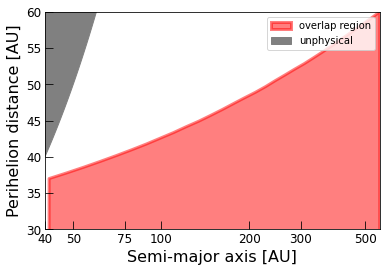

In [4]:
plt.fill_between(acrit,qvals,lw=3,color='r',alpha=0.5,label="overlap region")
plt.fill_betweenx(np.linspace(30,qmax),np.linspace(30,qmax),color='gray',label='unphysical')
plt.xscale('log')
plt.xlim(np.min(acrit),np.max(acrit))
plt.ylim(30,qmax)
aticks=[40,50,75,100,200,300,500]
plt.xticks(aticks,["{:d}".format(a) for a in aticks]);
plt.minorticks_off()
plt.tick_params(direction='in',which='major',size=8,labelsize=12)
plt.xlabel("Semi-major axis [AU]",fontsize=16)
plt.ylabel("Perihelion distance [AU]",fontsize=16)
plt.legend()